<a href="https://colab.research.google.com/github/AASani29/Math_Quiz5/blob/main/Ahmed_Alfey_Sani_210042129_SWE_Math4543_Quiz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1** - Basin of Attraction
Consider a differentiable function, denoted as $f(x)$, that possesses multiple roots. When initiating Newton-Raphson's Method with a given starting value for $x$, the process typically converges to one of the roots, barring exceptional cases outlined in the lecture slide. It stands to reason that starting points near each other should all end up at the same root, and for some functions this is true. However, it is not true in general.

A *basin of attraction* for a root is defined as the collection of $x$-values that, under Newton iterations, converge to that specific root. In the context of this problem, you will generate color-coded plots to visualize the basins of attraction for the following functions according to the following procedure:



*   Find the actual roots of the function by hand (this should be easy on the functions below).
*   Assign each of the roots a different color.
*   Pick a starting point on the $x$-axis and use it to start Newton-Raphson's method.
*   Color the starting point according to the root that it converges to.
*   Repeat this process for many many starting points so you get a colored picture of the $x$-axis showing where the starting points converge to.

The group of points sharing a common color designation represents the basin of attraction corresponding to the root associated with that particular color.

An example basin of attraction image for a cubic function looks something like this.
<br>
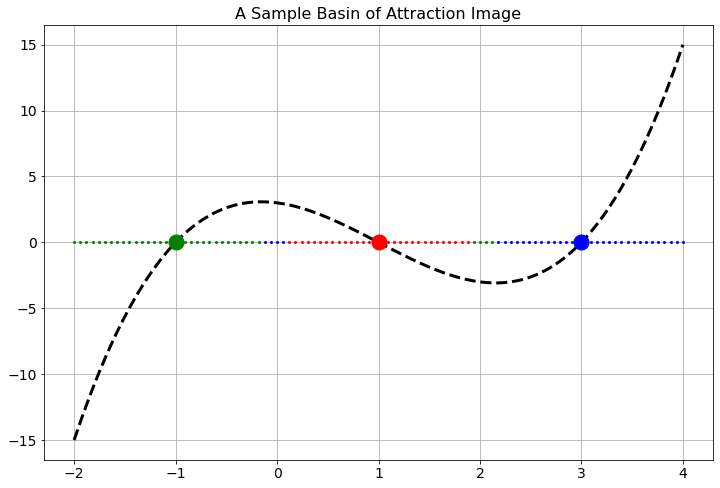

1.   Create a basin on attraction image for the function $f(x) = (x-4)(x+1)$.
2.   Create a basin on attraction image for the function $g(x) = (x-1)(x+3)$.
3.   Create a basin on attraction image for the function $h(x) = (x-4)(x-1)(x+3)$.

**Note:** You can use `matplotlib`, `plotly`, `pyplot`, `seaborn` or whatever plotting package you want.












In [ ]:
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Perform Newton-Raphson method to find a root of f(x).

    Parameters:
    f (function): The function whose root is to be found.
    df (function): The derivative of the function.
    x0 (float): Initial guess.
    tol (float): Tolerance for convergence.
    max_iter (int): Maximum number of iterations.

    Returns:
    float: The converged root approximation or None if it fails.
    """
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            return None  # Avoid division by zero
        delta = fx / dfx
        x_new = x - delta
        if abs(delta) < tol:
            return x_new
        x = x_new
    return x  # Return current x even if not fully converged

In [ ]:
def get_root_index(converged_x, roots, tol=1e-6):
    """
    Determine the index of the closest root to the converged value.

    Parameters:
    converged_x (float): The converged x-value from Newton-Raphson.
    roots (list): List of known roots.
    tol (float): Tolerance to consider converged_x close to a root.

    Returns:
    int or None: Index of the closest root or None if not within tolerance.
    """
    distances = np.abs(converged_x - roots)
    min_index = np.argmin(distances)
    if distances[min_index] <= tol:
        return min_index
    else:
        return None

In [ ]:
def plot_basin(f, df, roots, colors, x_range, resolution=1000, tol=1e-6):
    """
    Plot the basin of attraction for a function.

    Parameters:
    f (function): The function.
    df (function): The derivative of the function.
    roots (list): List of roots of the function.
    colors (list): Colors corresponding to each root.
    x_range (tuple): (x_min, x_max) for the plot.
    resolution (int): Number of points to sample.
    tol (float): Tolerance for root convergence.
    """
    x_min, x_max = x_range
    x0_values = np.linspace(x_min, x_max, resolution)
    root_indices = []

    for x0 in x0_values:
        root = newton_raphson(f, df, x0, tol)
        if root is None:
            root_indices.append(-1)
            continue
        idx = get_root_index(root, roots, tol)
        root_indices.append(idx if idx is not None else -1)

    # Assign colors: default black for unconverged
    color_map = ['black'] * len(x0_values)
    for i, idx in enumerate(root_indices):
        if idx != -1:
            color_map[i] = colors[idx]

    plt.figure(figsize=(10, 2))
    plt.scatter(x0_values, np.zeros_like(x0_values), c=color_map, s=1)
    plt.yticks([])
    plt.xlabel('Starting point (x0)')
    plt.xlim(x_min, x_max)
    plt.title('Basin of Attraction')
    plt.show()

In [ ]:
def f(x):
    return (x - 4) * (x + 1)

def df(x):
    return 2 * x - 3

In [ ]:
f_roots = [-1, 4]
f_colors = ['red', 'blue']

In [ ]:
def g(x):
    return (x - 1) * (x + 3)

def dg(x):
    return 2 * x + 2

In [ ]:
g_roots = [-3, 1]
g_colors = ['green', 'purple']

In [ ]:
def h(x):
    return (x - 4) * (x - 1) * (x + 3)

def dh(x):
    return 3 * x**2 - 4 * x - 11

In [ ]:
h_roots = [-3, 1, 4]
h_colors = ['orange', 'cyan', 'pink']

Basin of attraction for f(x) = (x-4)(x+1)


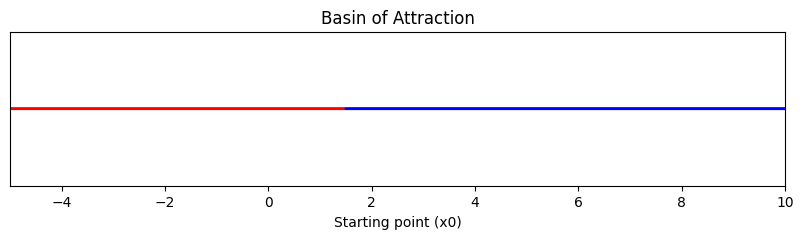

In [ ]:
print("Basin of attraction for f(x) = (x-4)(x+1)")
plot_basin(f, df, f_roots, f_colors, (-5, 10))


Basin of attraction for g(x) = (x-1)(x+3)


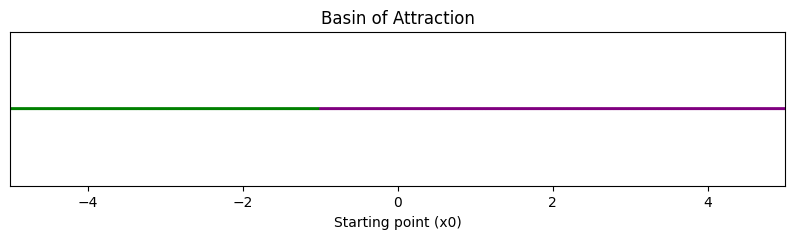

In [ ]:
print("\nBasin of attraction for g(x) = (x-1)(x+3)")
plot_basin(g, dg, g_roots, g_colors, (-5, 5))


Basin of attraction for h(x) = (x-4)(x-1)(x+3)


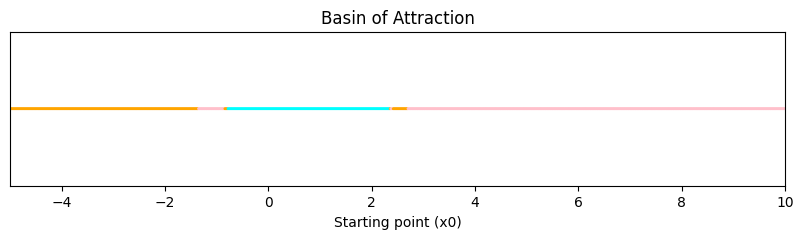

In [ ]:
print("\nBasin of attraction for h(x) = (x-4)(x-1)(x+3)")
plot_basin(h, dh, h_roots, h_colors, (-5, 10))

# **Problem 2** - The Goat Problem
To understand the problem statement, grab a pencil and a piece of paper at first!
* Draw a coordinate plane
* Draw a circle with radius $1$ unit centered at the point $(0,1)$. This circle will obviously be tangent to the $x$-axis.
* Draw a circle with radius $r$ centered at the point $(0,0)$. Take $0< r < 2$ so there are two intersections of the two circles.
* Label the left-hand intersection of the two circles as point $A$. (Point $A$ should be in the second quadrant of your coordinate plane.)
* Label the right-hand intersection of the two circles as point $B$. (Point $B$ should be in the first quadrant of your coordinate plane.)
* Label the point $(0,0)$ as the point $P$.

A rancher has built a circular fence of radius $1$ unit centered at the point $(0,1)$ for his goat to graze. He tethers his goat at point $P$ on the far south end of the circular fence. He wants to make the length of the goat’s chain, $r$, just long enough so that it can graze half of the area of the fenced region. How long should he make the chain?

**Hints:**

*   It would be helpful to write equations for both circles. Then you can use the equations to find the coordinates of the intersection points $A$ and $B$.
* You can either solve for the intersection points algebraically or you can use a numerical root finding technique to find the intersection points.
* In any case, the intersection points will (obviously) depend on the value of $r$.
* Set up an integral to find the area grazed by the goat.
* You will likely need to use a numerical integration technique to evaluate the integral.
* You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

Write your code to narrow down on the best value of $r$ where the integral evaluates to half the area of the fenced region.


In [ ]:
import math
from scipy.optimize import root_scalar

# Function to compute the area of intersection between two circles
def area_intersection(r, d, R):
    if r <= 0 or d <= 0 or R <= 0:
        return 0.0
    if (r + R < d) or (abs(R - r) > d):
        return 0.0

    # Calculate the arguments for arccos ensuring they are within [-1, 1]
    arg1 = (d**2 + r**2 - R**2) / (2 * d * r)
    arg1 = max(min(arg1, 1.0), -1.0)
    term1 = r**2 * math.acos(arg1)

    arg2 = (d**2 + R**2 - r**2) / (2 * d * R)
    arg2 = max(min(arg2, 1.0), -1.0)
    term2 = R**2 * math.acos(arg2)

    product = (-d + r + R) * (d + r - R) * (d - r + R) * (d + r + R)
    if product < 0:
        term3 = 0.0
    else:
        term3 = 0.5 * math.sqrt(product)

    return term1 + term2 - term3

# Function to calculate the error between the grazing area and the target area
def error(r, d, R, target_fraction):
    target_area = target_fraction * math.pi * R**2
    current_area = area_intersection(r, d, R)
    return current_area - target_area

# Parameters for the problem
d = 1.0  # Distance between centers of the two circles
R = 1.0  # Radius of the fenced circle
target_fraction = 0.5  # Target area is half of the total area of the fenced circle

# Solve for r using root_scalar with Brent's method between the bracket [1.0, 1.5]
sol = root_scalar(
    error,
    args=(d, R, target_fraction),
    bracket=[1.0, 1.5],  # Search for r in the interval [1.0, 1.5]
    method='brentq'  # Brent's method for root finding
)

# Output the solution
print(f"The required chain length r is approximately {sol.root:.6f}")

The required chain length r is approximately 1.158728


# **Problem 3** - Game of Cookies
Alice is a dessert-queen who can make exceptionally yummy chocolate chip cookies. Bob is a cookie connoisseur whose hunger rivals that of the (in)famous Cookie Monster from Sesame Street. One day, Alice and Bob decide to play a game. Bob chooses an arbitrary positive integer $k$. Alice doesn't know what this number $k$ is. She chooses two real numbers $a$ and $b$ randomly from within the interval $[0,1]$ with uniform distribution. Suppose, you are acting as the referee in this game. You compute the square root of the sum $(ak+1)^2 + (bk+1)^2$ and round it to the nearest integer. If the result is equal to $k$, Bob gets to eat $k$ of Alice's cookies for free; otherwise he doesn't get to eat any cookies.

For example, if $k = 6$, $a = 0.2$, and $b=0.85$, then the value that you get would be $\sqrt{(ak+1)^2 + (bk+1)^2} = \sqrt{42.05} = 6.484$. After you round it to the nearest integer it becomes $6$ which is equal to $k$. So, Bob will be allowed to eat $6$ cookies.

## Input
You'll be given the value of $n$, the number of turns of the game.

## Output
Print the expected value of the total number of cookies Bob will eat, rounded to five decimal places, if he plays $n$ turns with $k=1$, $k=2$, $k=3$, $\dots$, $k=n$ (for the $1^{st}$, $2^{nd}$, $3^{rd}$, $\dots$, and $n^{th}$ turns respectively).

### Sample Cases
#### Input
$10$

#### Output
$10.20914$

#### Input
$73$

#### Output
$105.27674$

#### Input
$100000$

#### Output
$157055.80999$

#### Input
$69420$

#### Output
$109021.5883$

**Hint:** You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

In [ ]:
import numpy as np
import multiprocessing as mp

# Function to estimate the probability of Bob getting cookies for a given k using Monte Carlo
def probability_of_eating(k, num_samples=50000):
    np.random.seed()  # Ensures random numbers are generated uniquely in parallel processes
    a_samples = np.random.uniform(0, 1, num_samples)
    b_samples = np.random.uniform(0, 1, num_samples)

    # Compute the formula for each sample
    values = np.sqrt(((a_samples * k) + 1) ** 2 + ((b_samples * k) + 1) ** 2)

    # Count cases where the rounded value equals k
    valid_cases = np.sum(np.round(values) == k)

    return valid_cases / num_samples

# Compute expected value of cookies Bob eats using parallel processing
def expected_cookies(n):
    with mp.Pool(mp.cpu_count()) as pool:
        probabilities = pool.map(probability_of_eating, range(1, n + 1))

    total_cookies = sum(k * prob for k, prob in zip(range(1, n + 1), probabilities))
    return round(total_cookies, 5)

# Test with example inputs
test_cases = [10, 73, 100000, 69420]

# Compute results
results = {n: expected_cookies(n) for n in test_cases}

# Display results
import pandas as pd
df_results = pd.DataFrame(list(results.items()), columns=["n", "Expected Cookies"])
print(df_results)


        n  Expected Cookies
0      10          10.17252
1      73         105.33936
2  100000      157883.57830
3   69420      109063.38370


# **Problem 4** - Geronimo!
An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is
$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1-e^{-kt/m}\right)$$
where $m$ is the mass measured in kg, $g$ is gravity measured in meters per second per second, $s_0$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

If $m=1kg$, $g=9.8ms^{-2}$, $k=0.1$, and $s_0=100m$, how long will it take for the object to hit the ground?

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def time_to_hit_ground(m, g, k, s0):
    """
    Calculate the time it takes for an object to hit the ground.

    Parameters:
    m (float): Mass of the object in kg.
    g (float): Acceleration due to gravity in m/s^2.
    k (float): Coefficient of air resistance.
    s0 (float): Initial position in meters.

    Returns:
    float: Time in seconds when the object hits the ground.
    """
    # Define the position function s(t)
    def s(t):
        return s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

    # Use fsolve to find the root of s(t) = 0
    t_guess = 10  # Initial guess for the root
    t_solution = fsolve(s, t_guess)

    return t_solution[0]

# Given parameters
m = 1  # kg
g = 9.8  # m/s^2
k = 0.1
s0 = 100  # meters

# Calculate the time to hit the ground
t = time_to_hit_ground(m, g, k, s0)
print(f"The object will hit the ground after {t:.2f} seconds.")

The object will hit the ground after 4.88 seconds.


# **Problem 5** - Int$\times$Plot
Numerically integrate each of the functions over the interval $[-1,2]$ with an appropriate technique and verify mathematically that your numerical integral is correct to 10 decimal places. Then provide a plot of the function along with its area beneath the curve.


1.   $f(x) = \frac{x}{1+x^4}$
2.   $g(x) = (x-1)^3(x-2)^2$
3. $h(x) = \sin(x^2)$

**Note:** Implement your own numerical integration function for this problem.



In [ ]:
import matplotlib.pyplot as plt

# Trapezoidal rule for numerical integration
def trapezoidal_rule(f, a, b, n=1000):
    """
    Numerically integrate f(x) over [a, b] using the trapezoidal rule.

    Parameters:
    f (function): The function to integrate.
    a (float): Lower limit of integration.
    b (float): Upper limit of integration.
    n (int): Number of subintervals (default: 1000).

    Returns:
    float: Approximate value of the integral.
    """
    h = (b - a) / n  # Step size
    x = np.linspace(a, b, n + 1)  # Points along the interval
    y = f(x)  # Function values at these points
    integral = h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))  # Trapezoidal rule
    return integral

In [ ]:
# Definong the functions
def f(x):
    return x / (1 + x**4)

def g(x):
    return (x - 1)**3 * (x - 2)**2

def h(x):
    return np.sin(x**2)

In [ ]:
# Integrate the functions over [-1, 2]
a, b = -1, 2
n = 10000  # Number of subintervals for higher accuracy

In [ ]:
integral_f = trapezoidal_rule(f, a, b, n)
print(f"Integral of f(x): {integral_f:.10f}")

Integral of f(x): 0.2702097527


In [ ]:
integral_g = trapezoidal_rule(g, a, b, n)
print(f"Integral of g(x): {integral_g:.10f}")

Integral of g(x): -27.4500011700


In [ ]:
integral_h = trapezoidal_rule(h, a, b, n)
print(f"Integral of h(x): {integral_h:.10f}")

Integral of h(x): 1.1150447796


In [ ]:
# Plot the functions and shaded areas
def plot_function_and_area(f, a, b, integral, title):
    x = np.linspace(a, b, 1000)
    y = f(x)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f"{title}")
    plt.fill_between(x, y, alpha=0.2, label=f"Area = {integral:.6f}")
    plt.title(f"{title} and Area Under the Curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

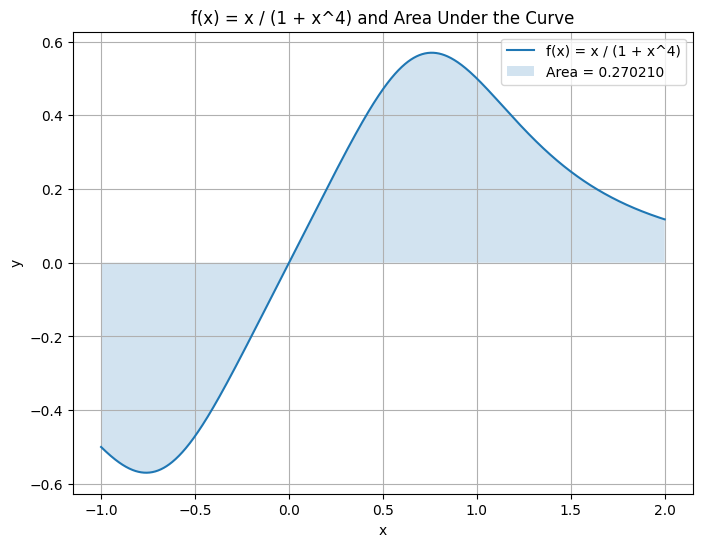

In [ ]:
# Plot each function
plot_function_and_area(f, a, b, integral_f, "f(x) = x / (1 + x^4)")

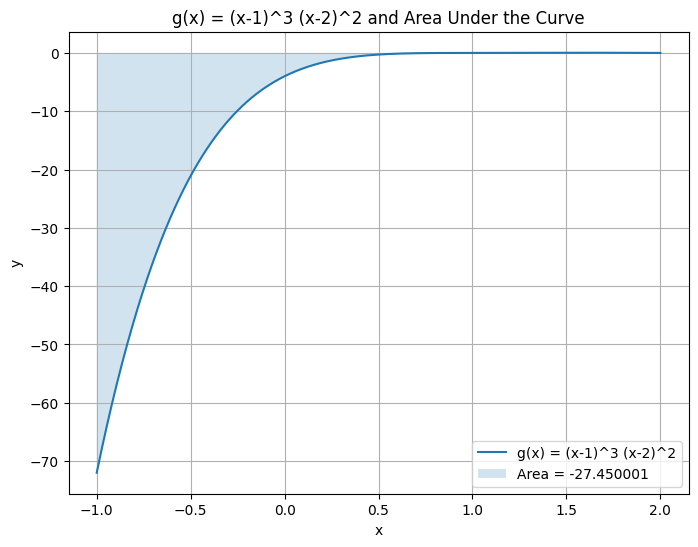

In [ ]:
plot_function_and_area(g, a, b, integral_g, "g(x) = (x-1)^3 (x-2)^2")

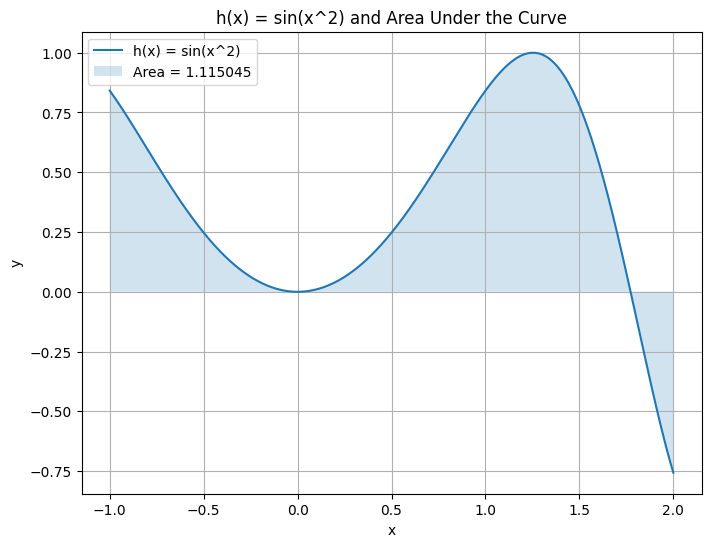

In [ ]:
plot_function_and_area(h, a, b, integral_h, "h(x) = sin(x^2)")